## GRIP - The Sparks Foundation Internship

### Data Science and Business Analytics

###  Author : Kishore Rajan K

### Batch : Gripjun21

### Task 1 : Prediction using supervised ML

### Objective : In this regression task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied for 9.25 hrs/day . This is a simple linear regression task as it involves just two variables  .

1. Connect the datasets from google drive to the google colab 

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


2. Importing all libraries required


In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline

3.  Reading data from url link


In [4]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(12)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


4. The shape of dataset 


In [5]:
data.shape

(25, 2)

5. The types of data

In [6]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

6. check the info of data


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


7. Check the description of student_score data


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#Exploratory Data Analysis
## Data Visualization
Now let's plot a graph of our data so that it will give us clear idea about data




 Plotting the distribution of scores


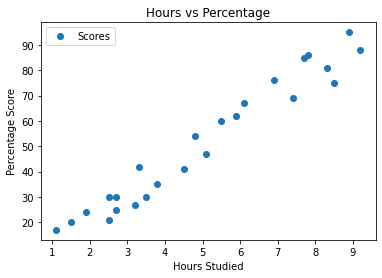

In [10]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.



##Linear Regression Model¶


Now we prepare the data and split it in test data.



In [11]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80,test_size=0.20,random_state=42)

##Training the model

In [13]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(X_train, y_train)
y_predict= linearRegressor.predict(X_train)

##Training the Algorithm

In [14]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training the data is complete.")

Training the data is complete.


 Plotting the regression line


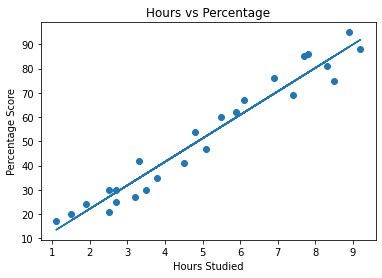

In [15]:
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

###The accuracy scores for training and test set

In [16]:
print('Test Score')
print(regressor.score(X_test, y_test))
print('Training Score')
print(regressor.score(X_train, y_train))

Test Score
0.9678055545167994
Training Score
0.9491209376364417


In [17]:
y_test

array([81, 30, 21, 76, 62])

In [18]:
y_predict

array([28.96850337, 34.77775026, 52.20549094, 39.61878934, 17.35000959,
       33.80954245, 46.39624405, 88.99738793, 85.12455667, 36.71416589,
       28.96850337, 21.22284085, 49.3008675 , 61.8875691 , 78.34710196,
       56.0783222 , 77.37889414, 13.47717832, 74.4742707 , 91.90201137])

In [19]:
data= pd.DataFrame({'Actual': y_test,'Predicted': y_predict[:5]})
print(data)

   Actual  Predicted
0      81  28.968503
1      30  34.777750
2      21  52.205491
3      76  39.618789
4      62  17.350010


##Let's predict the score for 9.25 hrs per day


In [20]:
print('Score of student who studied for 9.25 hours a dat', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a dat [92.38611528]


## Model Evaluation Metrics

In [21]:
mean_squ_error = mean_squared_error(y_test, y_predict[:5])
mean_abs_error = mean_absolute_error(y_test, y_predict[:5])
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)

Mean Squred Error: 1404.2200673968694
Mean absolute Error: 33.80918778157651
